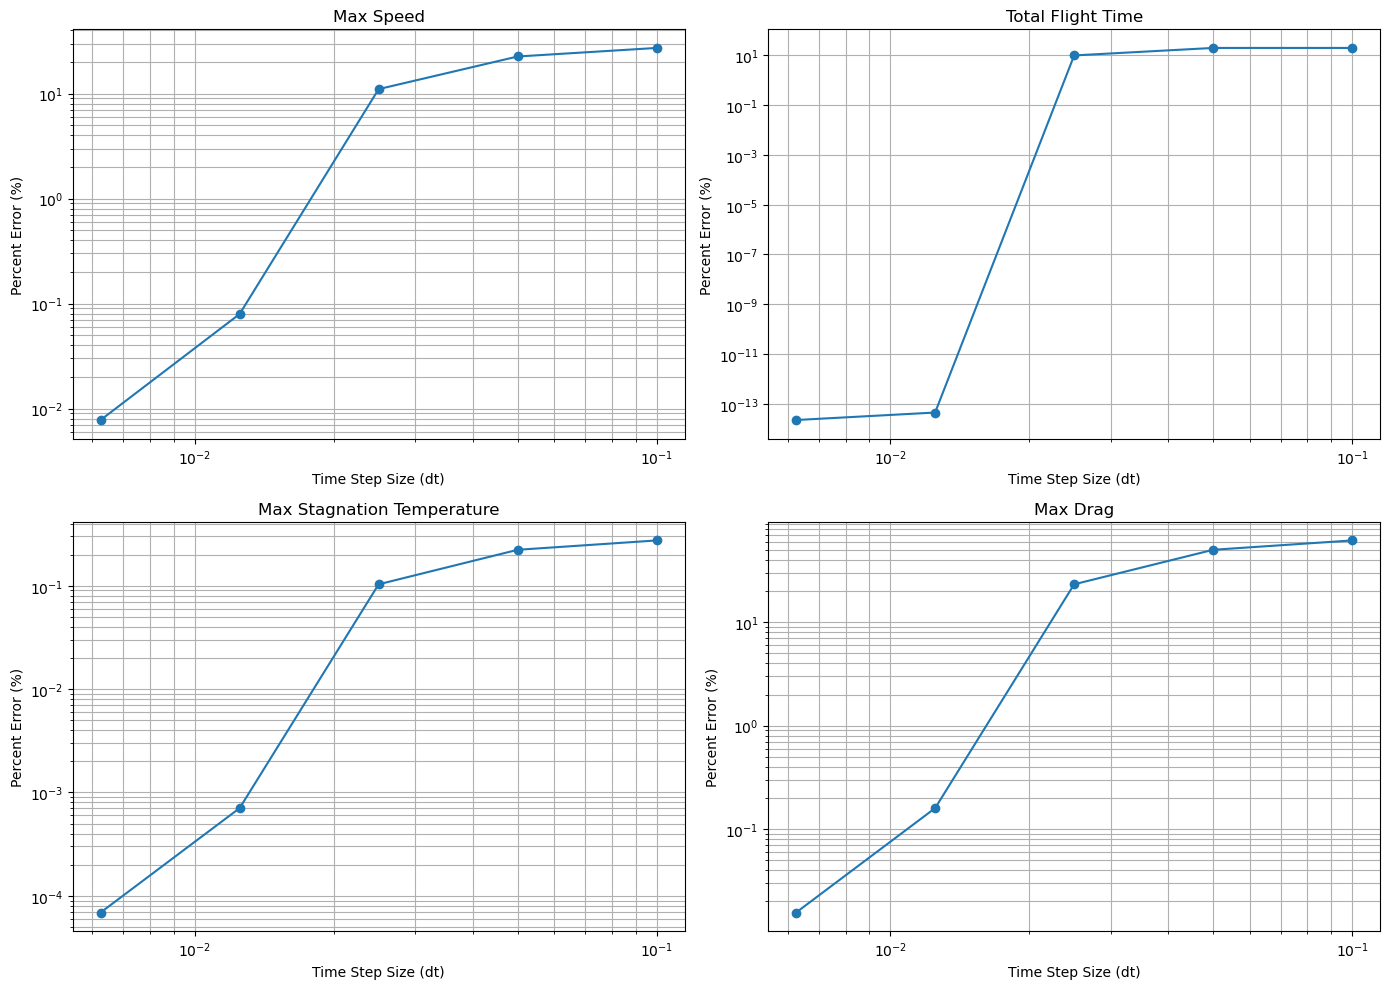

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import run_simulation
from thrust import motors

# Choose a motor for the study
motor = motors['O5500']

# Rocket and sim parameters (constant across runs)
rocket_params = {
    'diameter': 0.098,         # 98 mm
    'Cd': 0.75,
    'dry_mass': 20.0,
    'propellant_mass': 9.779,
    'launch_angle': 90.0,
    'v0_x': 0.0,
    'v0_y': 0.0
}
sim_params = {'wind': 0.0}

# Reference run with very small dt
ref_dt = 0.0005
ref_results = run_simulation(motor, rocket_params, sim_params, dt=ref_dt, verbose=False)
ref_max_speed = np.max(np.sqrt(ref_results['vx']**2 + ref_results['vy']**2))
ref_flight_time = ref_results['time'][-1]
ref_max_stag_temp = np.max(ref_results['stag_temp'])
ref_max_drag = np.max(ref_results['drag'])

# Test dt values for convergence
dts = [0.1, 0.05, 0.025, 0.0125, 0.00625]
errors_max_speed = []
errors_flight_time = []
errors_max_stag_temp = []
errors_max_drag = []

for dt in dts:
    results = run_simulation(motor, rocket_params, sim_params, dt=dt, verbose=False)
    # Compute metrics for this dt
    max_speed = np.max(np.sqrt(results['vx']**2 + results['vy']**2))
    flight_time = results['time'][-1]
    max_stag_temp = np.max(results['stag_temp'])
    max_drag = np.max(results['drag'])

    # Append percent errors
    errors_max_speed.append(abs(max_speed - ref_max_speed) / ref_max_speed * 100)
    errors_flight_time.append(abs(flight_time - ref_flight_time) / ref_flight_time * 100)
    errors_max_stag_temp.append(abs(max_stag_temp - ref_max_stag_temp) / ref_max_stag_temp * 100)
    errors_max_drag.append(abs(max_drag - ref_max_drag) / ref_max_drag * 100)



# Individual log-log plots for each metric
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

slopes = []
labels = [
    "Max Speed",
    "Total Flight Time",
    "Max Stagnation Temperature",
    "Max Drag"
]
errors_all = [
    errors_max_speed,
    errors_flight_time,
    errors_max_stag_temp,
    errors_max_drag
]

for i, (ax, label, errors) in enumerate(zip(axs, labels, errors_all)):
    valid_idxs = np.where(np.array(errors) > 0)[0]
    if len(valid_idxs) > 1:
        slope = np.polyfit(np.log(np.array(dts)[valid_idxs]), np.log(np.array(errors)[valid_idxs]), 1)[0]
    else:
        slope = float('nan')
    slopes.append(slope)
    ax.loglog(dts, errors, marker='o')
    ax.set_title(label)
    ax.set_xlabel("Time Step Size (dt)")
    ax.set_ylabel("Percent Error (%)")
    ax.grid(True, which='both')
    

plt.tight_layout()
plt.show()
